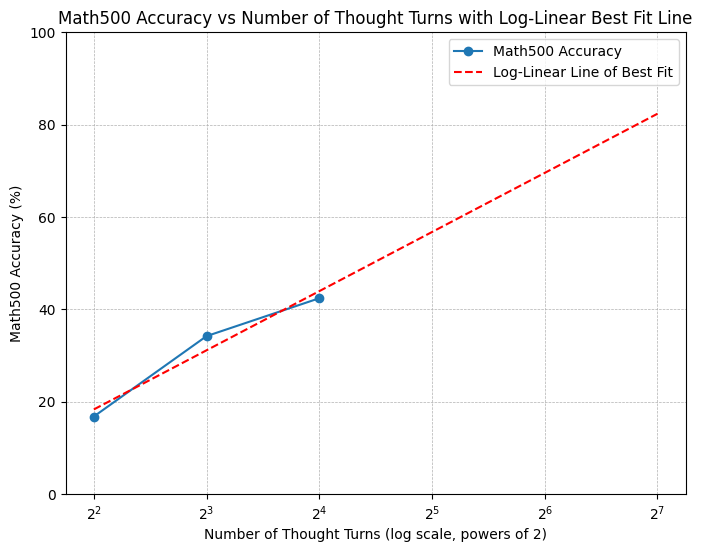

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Data
num_thought_turns = [4, 8, 16]
math500_accuracy = [16.8, 34.2, 42.4]

# Log-linear transformation: apply log to x-values
log_num_thought_turns = np.log2(num_thought_turns)

# Perform linear regression on the log-transformed x-values
slope, intercept, r_value, p_value, std_err = stats.linregress(log_num_thought_turns, math500_accuracy)

# Create a range of x values for the best fit line extending up to 128
x_values = np.linspace(4, 128, 1000)
log_x_values = np.log2(x_values)  # Log transform for linear regression
y_values = slope * log_x_values + intercept  # Log-linear line of best fit

# Plot
plt.figure(figsize=(8, 6))
plt.plot(num_thought_turns, math500_accuracy, marker='o', linestyle='-', label='Math500 Accuracy')
plt.plot(x_values, y_values, color='red', linestyle='--', label='Log-Linear Line of Best Fit')

# Set x-axis to logarithmic scale base 2
plt.xscale('log', base=2)

# Adjust x-ticks to reflect powers of 2 up to 128 (i.e., 2^2, 2^3, ..., 2^7)
x_ticks = [2**i for i in range(2, 8)]  # This will give us 4, 8, 16, 32, 64, 128
plt.xticks(x_ticks, labels=[f"$2^{i}$" for i in range(2, 8)])

# Scale the y-axis from 0 to 100
plt.ylim(0, 100)

plt.xlabel('Number of Thought Turns (log scale, powers of 2)')
plt.ylabel('Math500 Accuracy (%)')
plt.title('Math500 Accuracy vs Number of Thought Turns with Log-Linear Best Fit Line')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig('math500_accuracy_vs_num_thought_turns.png', dpi=300, bbox_inches='tight')
plt.show()